<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_Data-AI/blob/master/Copy_of_Copy_of_MidTermPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

MidTerm Part 1: Write your answers in this notebook and submit it to your github. This notebook is not complete, and you need to fill it to make it work. You may need to read the manual for some functions and classes.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. 

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); 
# Question 1. 1.1) What is the value of variable URLs.PETS?
#https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet

# 1.2) From which package would URLs.PETS have been imported?
#fastai.datasets

# 1.3) To which folder in your remote colab machine is the content of URLs.PETS downloaded?
#If we execute "path", we get PosixPath('/root/.fastai/data/oxford-iiit-pet') 
#that means the location of the content of URLs.PETS is the oxford-iiit-pet folder,
# which is inside data folder and so on, following the path /root/.fastai/data/oxford-iiit-pet

# 1.4) What are the contents of this folder?
#If we execute "path.ls", we get: 
#[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
#PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]
#which means the contents are a images foler and an annotations folder

#The output of path.ls() refers to particular folders that contain 
#the images and labels for the images that our model will classify

In [ ]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.


In [6]:
# Question 2. 2.1) Show me the names of 10 image files from the folder to which the image files were downloaded.
# Use function get_image_files() to do this.
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)
fnames[:10]


[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_90.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_59.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_155.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_73.jpg')]

In [ ]:
# 2.2) Having see the names of the image files, can you guess what the name of each
# image file represent?
# The filenames refer to particular images but they also contain categories or labels
# for those images. 
#We can notice that the labels are actually part of the file names in the fnames list. 
#For example, in  PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),
#Birman is going to be the label

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
#dataBunch = ImageDataBunch.from_name_re(....).normalize(imagenet_stats)
# Question 3. 3.1) Use function from_name_re of class ImageDataBunch to create a "dataBunch".
# The dataBunch contains information about the size of the batch, the images to be used for training
# the neural network and their labels, the images to be used for validating the neural network and their labels.
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=224, bs=bs
                                  ).normalize(imagenet_stats)
                                

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
# Question 4. Please answer the following questions about the created dataBunch: 
#(we can find out by executing "data")

# 4.1) How many image items does the Train dataset contain?
#5912 items
# 4.2) How many category items does the Train dataset contain?
#5912 items
# 4.3) How many image items does the Validation dataset contain?
#1478 items
# 4.4) How many category items does the Validation dataset contain?
#1478 items

In [ ]:
data

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,basset_hound,shiba_inu,Sphynx,english_cocker_spaniel
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,Birman,leonberger,shiba_inu,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [ ]:
 # Question 5. 5.1) Show me 10 data items from the created dataBunch?
 #I will show 10 classes from the created dataBunch
dclasses = data.classes
dclasses[:10]

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

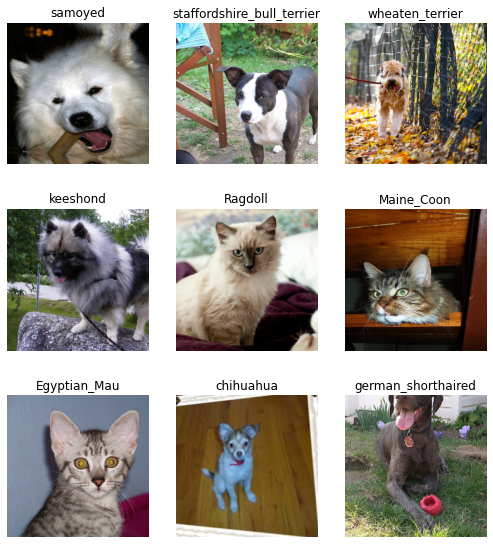

In [ ]:
#I can also show a few pictures of things from my data bunch
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
 # 5.2) Show the number of classes in the dataBunch by executing an appropriate method of dataBunch object?
 len(data.classes),data.c

(37, 37)

## Training: resnet34

Now we will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Specifically, we will use reset34. We are in fact building a function which will take an image as input and will compute an output for the input. 

Question 6. What kind of information does this output represent?


In [9]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 7: We use function cnn_learner() to create an object that will learn a neural network
# by feeding dataBunch to the pretrained resnet34.

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# 7.1) From which package was "models" imported?
help(models)
#models was imported from package fastai.vision.models in fastai.vision

Help on package fastai.vision.models in fastai.vision:

NAME
    fastai.vision.models

PACKAGE CONTENTS
    cadene_models
    darknet
    efficientnet
    presnet
    unet
    wrn
    xception
    xresnet
    xresnet2

DATA
    xresnet101 = functools.partial(<function xresnet at 0x7ffb44e...ion=4,...
    xresnet152 = functools.partial(<function xresnet at 0x7ffb44e...ion=4,...
    xresnet18 = functools.partial(<function xresnet at 0x7ffb44e...nsion=1...
    xresnet18_deep = functools.partial(<function xresnet at 0x7ffb44e...la...
    xresnet34 = functools.partial(<function xresnet at 0x7ffb44e...nsion=1...
    xresnet34_deep = functools.partial(<function xresnet at 0x7ffb44e...la...
    xresnet50 = functools.partial(<function xresnet at 0x7ffb44e...nsion=4...
    xresnet50_deep = functools.partial(<function xresnet at 0x7ffb44e...la...

FILE
    /usr/local/lib/python3.6/dist-packages/fastai/vision/models/__init__.py




In [ ]:
# models.resent34 is a pretained neural network, that is, the neural network that is 
# already trained by using one and half a million images and thousands of categories. 
# We are going to train the new neural network  by using less than
# 10000 dog and cat images and 37 categories. That is, we are going to retrain the
# pretrained neural network "resnet34" by using few dogs and cats images (less than 1 % of the 
# dataset used to train the original pretrained neural network). 
# This neural network is supposed to classify new types of images, i.e. dogs and cats better than the original
# resnet34. 

# In the following, the neural network "freezes" the much of the neural network "reset34" and retain
# only a tiny part of it using the new dataset. This process is called "learning transfer".
# 
# 7.2) Tell me which part of the resnet34 is re-trained and which part of it remains to be fixed?
# To answer this question, refer:
# the first figure in this site: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# # https://blog.roboflow.com/how-to-train-a-custom-resnet34-model/. 
# and picture "34 layers residual" in https://blog.roboflow.com/custom-resnet34-classification-model/ .

#the last layer (34th layer) is re-trained and the first 33 layers remain fixed

# 7.3) Please tell me why this learning transfer would work? 
#Resnet34 is a pre-trained model, which means it has already learned how to 
#recognize thousands of categories of things. We use transfer learning when 
#training our model, by taking a model that already knows how to classify 
#some things pretty well and make it so that it can classify specific things really well.
#In this case, cats and dogs.




In [11]:
# Question 8: (8.1) Please re-train the neural network for 5 epochs.
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.362297,0.307234,0.102165,01:34
1,0.597441,0.300913,0.094723,01:34
2,0.377519,0.249193,0.085927,01:34
3,0.272485,0.231767,0.076455,01:33


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
# (8.2) For each epoch, it will show the train_loss and the validation_loss. 
# Explain how these losses are computed. 

#train_loss is the error on the training set of data.
#validation_loss is the error after running the validation set of data through the trained network.
#They are computed by calculating the difference between predicted value and target
#in each training or validation sets. 

# (8.3) Tell me how the train_loss and the validation_loss change as the epoch progresses.
#The train_loss, valid_loss, values show a 
#steady improvement in test accuracy as the epoch progresses.
#We can see a sharp increase in test accuracy from epoch 0 to 2 epochs,
# but by epoch 3 to 4 it appears to level off. 


# (8.4) Tell me how "error_rate" would be computed? 
# You need to refer to what kind of data is used to compute the error-rate.

#the error_rate is computed with the validation data, calculating the times the model made 
#a correct prediction over the times it did a wrong prediction.
#It represents the percentage of times our model made wrong predictions, 
#in other words it represents the accuracy of the model, as 100 - error_rate = accuracy.

# (8.5) Would you increase the number of epochs or decrease it to get a better result?
#If ter heof poch is too small, itresults in a poor approximation, so a bigger 
#amount of epochs is preferred. However, too many epochs might as well overfit the model 
#also resulting in poor performance. When it's overfitting, model does not learn the data, it memorizes the data.
#So weld stop increasing epochs when the error rate of validation data is minimum.


## Results

Let's see what results we have got. 

See  which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)

losses,indices = interpretation.top_losses()
# QUestion 9. 
# 9.1) Please show the first 10 values of losses and indices, and explain  they represent?
interp.plot_top_losses(10, figsize=(15,11))
#The above statement displays the images in the validation dataset
#whose losses are great, more precisely whose losses belong to the top 10.
#shows classes 
#that the model got wrong the most often. 



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
# interp.plot_top_losses(12, largest=True, figsize=(20,11))
# Question 10. 10.1) Use the above function to see the result of classification for the validation dataset. 
# Please explain the meaning of the first item and the meaning of the 12th item.
# 10.2) execute interp.plot_top_losses(12, largest=False, figsize=(20,11))
# Explain the meaning of the 12th item.


In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)
# Question 11: 11.1) It will show the 37 x 37 matrix. What does the row of 
#  "american_pit_bull_terrier" tell you about the capability of this neural network?
